In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv("dataset.csv")
print(df.shape)

(20000, 15)


--------------------------------------------------
col :  is_FK_Advantage_product


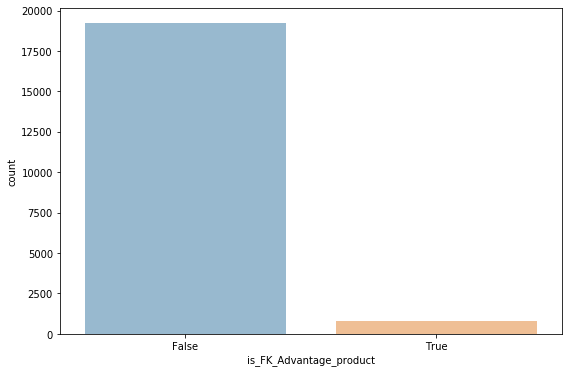

--------------------------------------------------
col :  product_rating


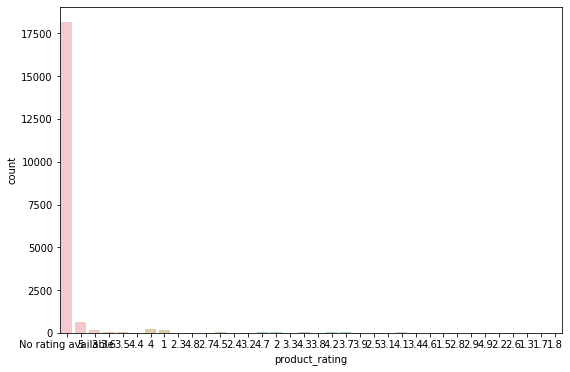

--------------------------------------------------
col :  overall_rating


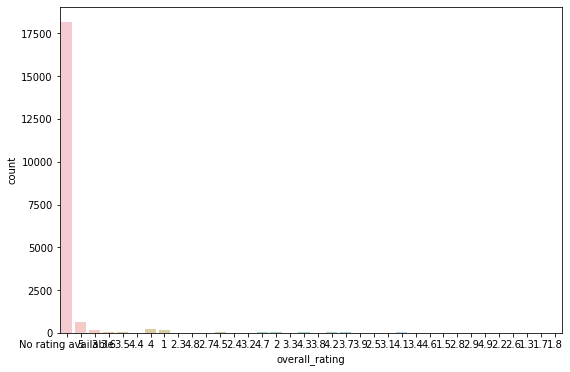

In [3]:
category_cols = ['is_FK_Advantage_product', 'product_rating','overall_rating']
for col in category_cols:
        
    print('-' * 50)
    print('col : ', col)
    
    f, ax = plt.subplots(figsize=(9, 6))
    sns.countplot(x=col, data=df, alpha=0.5)
    plt.show()

In [4]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [5]:
data = df[['product_name','pid','product_category_tree', 'retail_price', 'discounted_price',
         'is_FK_Advantage_product', 'description', 'product_rating',
         'overall_rating', 'brand', 'product_specifications']].copy()

Creating new data-frame, with only rated products

In [6]:
data = data[data['product_rating'] != 'No rating available']
data['index'] = range(len(data))
data = data.set_index('index')
data.head(2)

,product_name,pid,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
index,,,,,,,,,,,
0,Ladela Bellies,SHOEH4KM2W3Z6EH5,"[""Footwear >> Women's Footwear >> Ballerinas >...",1724.0,950.0,False,Key Features of Ladela Bellies Brand: LADELA C...,5,5,Ladela,"{""product_specification""=>[{""key""=>""Occasion"",..."
1,Bulaky vanity case Jewellery Vanity Case,VANDZY4YZFPEG85T,"[""Beauty and Personal Care >> Makeup >> Vanity...",499.0,390.0,False,Buy Bulaky vanity case Jewellery Vanity Case f...,3,3,NaN,"{""product_specification""=>{""key""=>""Body Materi..."


----------------------------------------------------

# Clustering

In [12]:
def extract_product_categories(data):
    s = json.loads(data)
    s = s[0]
    s = s.replace(" >> ", "|")
    
    arr = []
    for i in range(len(s)):
        if s[i] == '|':
            arr.append(i)
    
    last = len(arr)
    if last > 2:
        return s[:arr[-2]]
    
    elif last == 2:
        return s[:arr[-1]]
    
    else:
        return s;

In [13]:
data['product_category'] = data['product_category_tree'].apply(extract_product_categories)
data = data.drop(['product_category_tree'], axis=1)

category = data['product_category'].str.get_dummies()
category.head()

,Academic Texts,Accessories,Accessories & Combo Sets,Accessories & Spare parts,Art & Craft,Artificial Plants,Audio Players,Automotive,Baby & Kids Gifts,Baby Bath & Skin,...,Video Players & Accessories,Wall Decor & Clocks,Wallets & Clutches,Watches,Western Wear,Winter & Seasonal Wear,Women's Clothing,Women's Footwear,Wrist Watches,eBooks
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [14]:
standard_scaler = StandardScaler()
scaled_category = standard_scaler.fit_transform(category)
category[category.columns] = scaled_category

In [15]:
products = pd.concat([data['pid'], category], axis=1)
products

,pid,Academic Texts,Accessories,Accessories & Combo Sets,Accessories & Spare parts,Art & Craft,Artificial Plants,Audio Players,Automotive,Baby & Kids Gifts,...,Video Players & Accessories,Wall Decor & Clocks,Wallets & Clutches,Watches,Western Wear,Winter & Seasonal Wear,Women's Clothing,Women's Footwear,Wrist Watches,eBooks
index,,,,,,,,,,,,,,,,,,,,,
0,SHOEH4KM2W3Z6EH5,-0.023262,-0.040313,-0.040313,-0.107182,-0.023262,-0.032906,-0.023262,-0.114676,-0.032906,...,-0.023262,-0.073741,-0.040313,-0.341388,-0.396322,-0.121733,-0.537124,4.345310,-0.341388,-0.023262
1,VANDZY4YZFPEG85T,-0.023262,-0.040313,-0.040313,-0.107182,-0.023262,-0.032906,-0.023262,-0.114676,-0.032906,...,-0.023262,-0.073741,-0.040313,-0.341388,-0.396322,-0.121733,-0.537124,-0.230133,-0.341388,-0.023262
2,CGNEDFY77SGZTEQ2,-0.023262,-0.040313,-0.040313,-0.107182,-0.023262,-0.032906,-0.023262,-0.114676,-0.032906,...,-0.023262,-0.073741,-0.040313,-0.341388,-0.396322,8.214711,-0.537124,-0.230133,-0.341388,-0.023262
3,WATE6Y6D2MZHWGBZ,-0.023262,-0.040313,-0.040313,-0.107182,-0.023262,-0.032906,-0.023262,-0.114676,-0.032906,...,-0.023262,-0.073741,-0.040313,2.929217,-0.396322,-0.121733,-0.537124,-0.230133,2.929217,-0.023262
4,WATE2RX9HHGBUQGA,-0.023262,-0.040313,-0.040313,-0.107182,-0.023262,-0.032906,-0.023262,-0.114676,-0.032906,...,-0.023262,-0.073741,-0.040313,2.929217,-0.396322,-0.121733,-0.537124,-0.230133,2.929217,-0.023262
5,WATEBYZGFCZPUJAR,-0.023262,-0.040313,-0.040313,-0.107182,-0.023262,-0.032906,-0.023262,-0.114676,-0.032906,...,-0.023262,-0.073741,-0.040313,2.929217,-0.396322,-0.121733,-0.537124,-0.230133,2.929217,-0.023262
6,SHOE4UC3MJZF3VFJ,-0.023262,-0.040313,-0.040313,-0.107182,-0.023262,-0.032906,-0.023262,-0.114676,-0.032906,...,-0.023262,-0.073741,-0.040313,-0.341388,-0.396322,-0.121733,-0.537124,4.345310,-0.341388,-0.023262
7,WATE4CG2AQAGWGSF,-0.023262,-0.040313,-0.040313,-0.107182,-0.023262,-0.032906,-0.023262,-0.114676,-0.032906,...,-0.023262,-0.073741,-0.040313,2.929217,-0.396322,-0.121733,-0.537124,-0.230133,2.929217,-0.023262
8,SHOEYGK5AYYBVXKH,-0.023262,-0.040313,-0.040313,-0.107182,-0.023262,-0.032906,-0.023262,-0.114676,-0.032906,...,-0.023262,-0.073741,-0.040313,-0.341388,-0.396322,-0.121733,-0.537124,4.345310,-0.341388,-0.023262


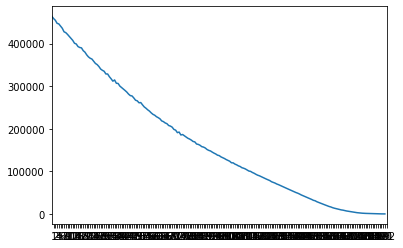

In [16]:
def kmeans(n_clusters, category):
    model = KMeans(n_clusters=n_clusters)
    model.fit(category)
    return [n_clusters, model.inertia_]

elbow_data = [kmeans(n_clusters, scaled_category) for n_clusters in range(1, 193)]
elbow_data = pd.DataFrame(elbow_data, columns=['clusters', 'inertia'])

elbow_data['inertia'].plot(xticks=elbow_data['clusters'])

### Elbow obtained around 170

In [17]:
model = KMeans(n_clusters=170)
model.fit(scaled_category)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=170, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

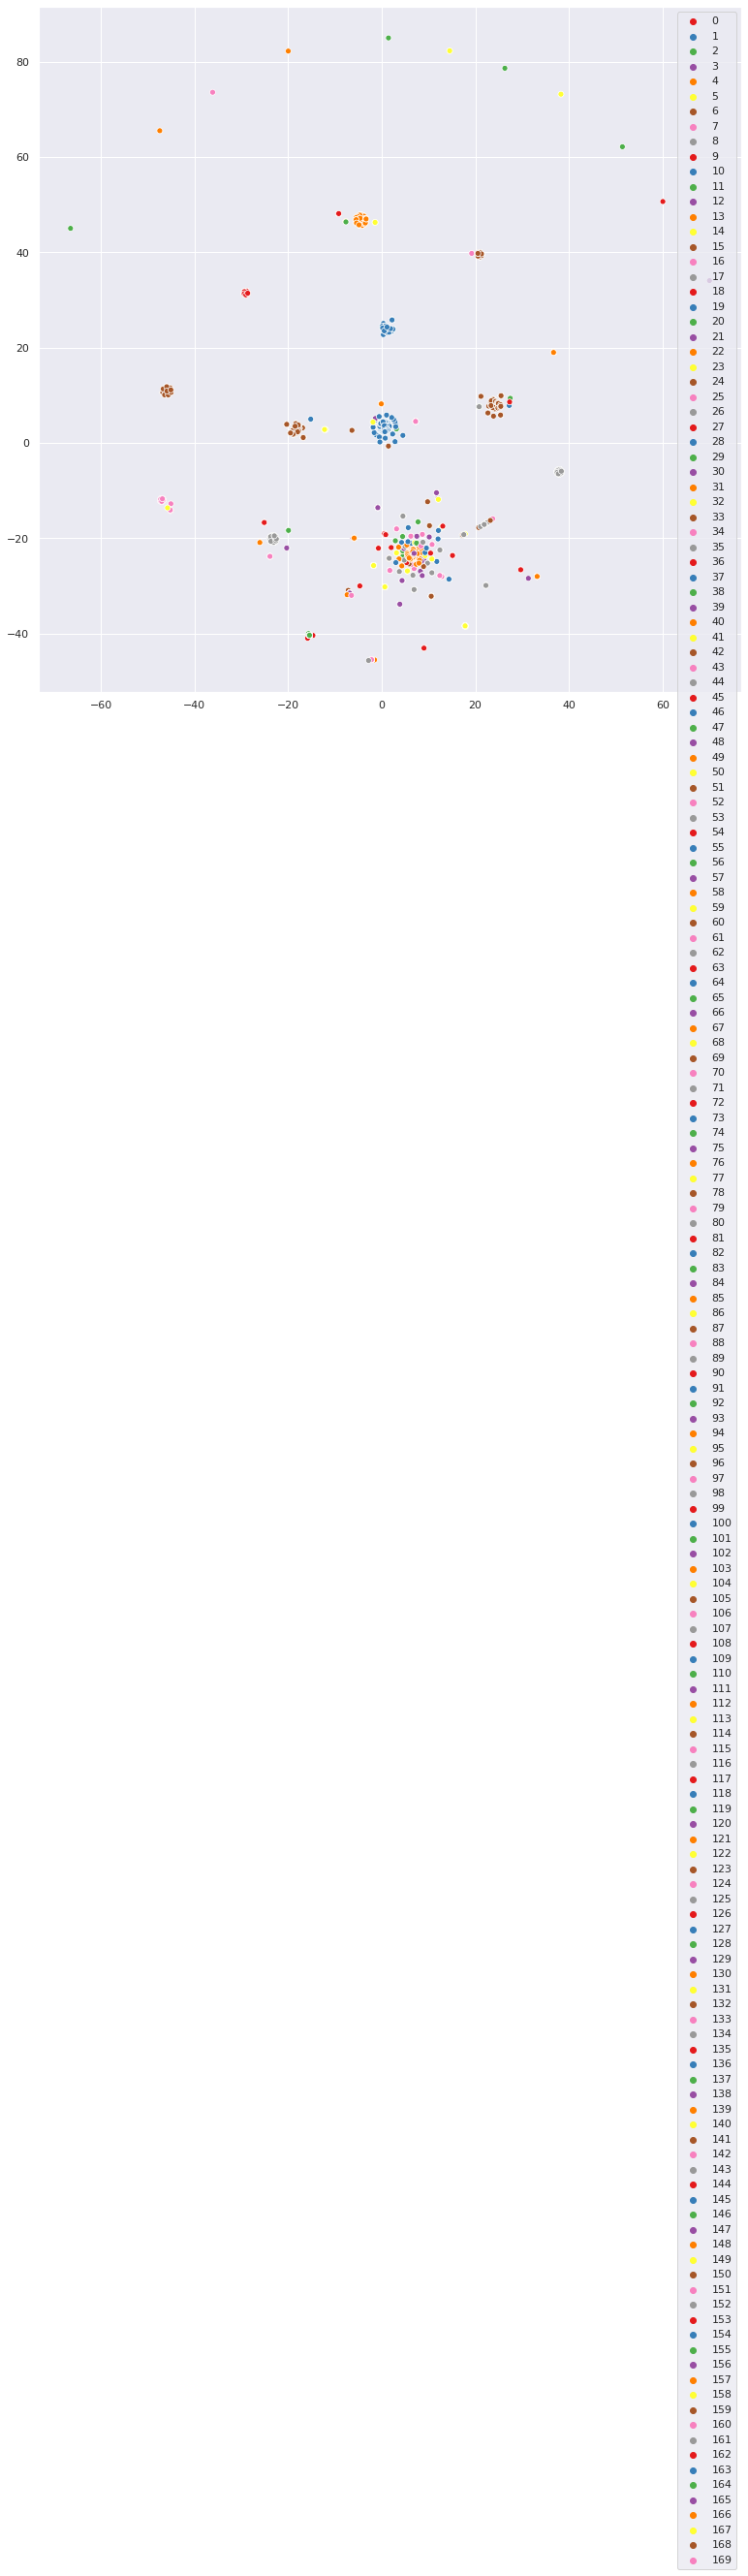

In [18]:
tsne = TSNE()
reduced_category = tsne.fit_transform(scaled_category)
len(reduced_category)

sns.set(rc={ 'figure.figsize': (13,13) })
sns.scatterplot(
    x=reduced_category[:, 0],
    y=reduced_category[:, 1],
    hue=model.labels_,
    palette=sns.color_palette('Set1', 170))

In [19]:
# # Agglomerative clustering
# model = AgglomerativeClustering(n_clusters=4)
# agglomerate_category = model.fit_predict(scaled_category)

# sns.scatterplot(
#     x=reduced_category[:, 0],
#     y=reduced_category[:, 1],
#     hue=agglomerate_category)

# # Dendrogram
# distance_matrix = linkage(category_groups)
# distance_matrix
# dendrogram(distance_matrix)

# # DBSCAN
# model = DBSCAN()
# density_category_clusters = model.fit_predict(scaled_category)

# sns.scatterplot(
#     x=reduced_category[:, 0],
#     y=reduced_category[:, 1],
#     hue=density_category_clusters)

------------------------------------------

--------------------------------------

## Content based filtering : Product Description

In [7]:
import glob
import re, os
import pickle
from nltk.stem import PorterStemmer
from gensim.models import TfidfModel
from gensim import similarities
from gensim import corpora
from scipy.cluster import hierarchy

%matplotlib inline

unable to import 'smart_open.gcs', disabling that module


In [8]:
def extract_prod_categories(data):
    s = json.loads(data)
    s = s[0]
    s = s.replace(" >> ", "|")
    
    return s;

### Loading data

Make a new dataframe with rated products only

In [9]:
df = pd.read_csv("dataset.csv")
data = df[['product_name','pid','product_category_tree', 'retail_price', 'discounted_price',
         'is_FK_Advantage_product', 'description', 'product_rating',
         'overall_rating', 'brand', 'product_specifications']].copy()

data = data[data['product_rating'] != 'No rating available']
data['index'] = range(len(data))
data = data.set_index('index')
data['product_category'] = data['product_category_tree'].apply(extract_prod_categories)
data = data.drop(['product_category_tree'], axis=1)

In [10]:
data['description'][2]

"Key Features of Roadster Men's Zipper Solid Cardigan Fabric: 100% Acrylic Suitable For: Western Wear,Roadster Men's Zipper Solid Cardigan Price: Rs. 699 Navy blue and olive green cardigan, has a mock collar, a full zip closure, long raglan sleeves, two insert pockets, a ribbed hemLook stylish while beating the winter chill in this comfortable cardigan from Roadster. Team it with a pair of jeans and casual shoes when heading out for the day..,Specifications of Roadster Men's Zipper Solid Cardigan Cardigan Details Closure Zipper Sleeve Full Sleeve Number of Contents in Sales Package Pack of 1 Fabric 100% Acrylic General Details Pattern Solid Ideal For Men's Occasion Casual Fabric Care Machine-Wash Cold Additional Details Style Code 872907"

### Pre-processing

In [14]:
data.head(2)

,product_name,pid,retail_price,discounted_price,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_category
index,,,,,,,,,,,
0,Ladela Bellies,SHOEH4KM2W3Z6EH5,1724.0,950.0,False,Key Features of Ladela Bellies Brand: LADELA C...,5,5,Ladela,"{""product_specification""=>[{""key""=>""Occasion"",...",Footwear|Women's Footwear|Ballerinas|Ladela Be...
1,Bulaky vanity case Jewellery Vanity Case,VANDZY4YZFPEG85T,499.0,390.0,False,Buy Bulaky vanity case Jewellery Vanity Case f...,3,3,NaN,"{""product_specification""=>{""key""=>""Body Materi...",Beauty and Personal Care|Makeup|Vanity Boxes|B...


In [16]:
cats = data['description'].tolist()
prod_names = data['product_name'].tolist()

cats = [cat.lower() for cat in cats]     # lower case
cats = [cat.split() for cat in cats]  # split at '|'

cats[0]

['key',
 'features',
 'of',
 'ladela',
 'bellies',
 'brand:',
 'ladela',
 'color',
 ':',
 'black,ladela',
 'bellies',
 'price:',
 'rs.',
 '950',
 'experience',
 'the',
 'best',
 'bellies',
 'from',
 'the',
 'house',
 'of',
 'ladela.',
 'providing',
 'the',
 'best',
 'material',
 'to',
 'keep',
 'your',
 'feet',
 'cozy',
 'and',
 'active',
 'for',
 'the',
 'whole',
 'day.,specifications',
 'of',
 'ladela',
 'bellies',
 'general',
 'occasion',
 'casual',
 'ideal',
 'for',
 'women',
 'shoe',
 'details',
 'heel',
 'height',
 '0',
 'inch',
 'outer',
 'material',
 'pu',
 'color',
 'black']

### Building Bag of Words

In [17]:
dictionary = corpora.Dictionary(cats)

bows = [dictionary.doc2bow(prod) for prod in cats]

bows[0][:5]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]

Exploring the first product of the data frame

In [18]:
df_bow_balle = pd.DataFrame(bows[0])

df_bow_balle.columns = ['index', 'occurrences']
df_bow_balle['token'] = df_bow_balle['index'].apply(lambda x: dictionary[x])

df_bow_balle = df_bow_balle.sort_values('occurrences', ascending=False)
df_bow_balle.head(10)

,index,occurrences,token
5,5,4,bellies
39,39,4,the
28,28,3,ladela
32,32,3,of
6,6,2,best
18,18,2,for
30,30,2,material
11,11,2,color
0,0,1,0
33,33,1,outer


## Tf-idf model

In [19]:
model = TfidfModel(bows)

model[bows[0]]

[(0, 0.10352527737386671),
 (1, 0.14884807849356646),
 (2, 0.11376931674062538),
 (3, 0.1400106987993441),
 (4, 0.040376881245476025),
 (5, 0.5349619124813328),
 (6, 0.09673329496303605),
 (7, 0.05053091775837529),
 (8, 0.1639556788667997),
 (9, 0.1639556788667997),
 (10, 0.04741194040489406),
 (11, 0.11995091633085903),
 (12, 0.14884807849356646),
 (13, 0.14884807849356646),
 (14, 0.06844651562092562),
 (15, 0.12490309842611082),
 (16, 0.062312945296357086),
 (17, 0.12887691711385862),
 (18, 0.00477918731664587),
 (19, 0.02107734796831446),
 (20, 0.05803285936594421),
 (21, 0.09468789767964432),
 (22, 0.08841767700063347),
 (23, 0.10352527737386671),
 (24, 0.05997545816542951),
 (25, 0.08410593433242856),
 (26, 0.10220392372074905),
 (27, 0.07435646925228628),
 (28, 0.4918670366003992),
 (29, 0.1639556788667997),
 (30, 0.15091128599683423),
 (31, 0.08646452084558295),
 (32, 0.06041045598090238),
 (33, 0.10220392372074905),
 (34, 0.03775967476823273),
 (35, 0.1337404781203332),
 (36, 0

In [20]:
df_tfidf = pd.DataFrame(model[bows[0]])

df_tfidf.columns = ['id', 'score']
df_tfidf['token'] = df_tfidf['id'].apply(lambda x: dictionary[x])

df_tfidf = df_tfidf.sort_values('score', ascending=False)
df_tfidf.head(10)

,id,score,token
5,5,0.534962,bellies
28,28,0.491867,ladela
39,39,0.173063,the
9,9,0.163956,brand:
29,29,0.163956,ladela.
8,8,0.163956,"black,ladela"
30,30,0.150911,material
1,1,0.148848,950
13,13,0.148848,"day.,specifications"
12,12,0.148848,cozy


In [21]:
sims = similarities.MatrixSimilarity(model[bows])

sim_df = pd.DataFrame(list(sims))
sim_df.columns = prod_names
sim_df.index = prod_names

sim_df

,Ladela Bellies,Bulaky vanity case Jewellery Vanity Case,Roadster Men's Zipper Solid Cardigan,"Camerii WM64 Elegance Analog Watch - For Men, Boys","Colat COLAT_MW20 Sheen Analog Watch - For Men, Women, Boys, Girls","Rorlig RR-028 Expedition Analog Watch - For Men, Boys",Lyc White Casual Boots,Fluid DMF-002-GR01 Digital Watch - For Boys,Bruno Manetti Cannelita Boots,"Kool Kidz DMK-012-QU02 Analog Watch - For Girls, Boys",...,Kielz Women Heels,Sindhi Footwear Women Wedges,Kielz Women Heels,Belle Gambe Women Heels,Kielz Women Heels,Do Bhai Women Heels,Sindhi Footwear Ballerina Bellies,Purple Women Heels,Uberlyfe Large Vinyl Sticker,We Witches Comfy Hues Women Wedges
Ladela Bellies,1.000000,0.005826,0.047226,0.000031,0.000029,0.013424,0.011461,0.003534,0.000810,0.000030,...,0.016265,0.013124,0.016265,0.011623,0.016265,0.014195,0.242640,0.017683,0.007586,0.010084
Bulaky vanity case Jewellery Vanity Case,0.005826,1.000000,0.000893,0.003214,0.002934,0.004803,0.005842,0.003218,0.004129,0.060353,...,0.012922,0.010426,0.012922,0.009233,0.012922,0.011277,0.004302,0.014048,0.036591,0.008011
Roadster Men's Zipper Solid Cardigan,0.047226,0.000893,1.000000,0.000562,0.000513,0.054404,0.014978,0.000563,0.000557,0.007607,...,0.001743,0.001406,0.001743,0.001245,0.001743,0.023975,0.000580,0.001894,0.001163,0.001080
"Camerii WM64 Elegance Analog Watch - For Men, Boys",0.000031,0.003214,0.000562,1.000000,0.121906,0.054284,0.012989,0.117063,0.009180,0.132864,...,0.016014,0.012921,0.016014,0.011443,0.016014,0.013976,0.009566,0.017409,0.004185,0.009928
"Colat COLAT_MW20 Sheen Analog Watch - For Men, Women, Boys, Girls",0.000029,0.002934,0.000513,0.121906,1.000000,0.036554,0.011857,0.080301,0.008380,0.065651,...,0.014618,0.011794,0.014618,0.010445,0.014618,0.012757,0.008732,0.015891,0.003820,0.009063
"Rorlig RR-028 Expedition Analog Watch - For Men, Boys",0.013424,0.004803,0.054404,0.054284,0.036554,1.000000,0.000724,0.027371,0.000512,0.045870,...,0.000156,0.000126,0.000156,0.000111,0.000156,0.000136,0.000533,0.000169,0.006254,0.000097
Lyc White Casual Boots,0.011461,0.005842,0.014978,0.012989,0.011857,0.000724,1.000000,0.013005,0.155286,0.012638,...,0.040835,0.032948,0.040835,0.029180,0.040835,0.035639,0.017142,0.132767,0.007607,0.075715
Fluid DMF-002-GR01 Digital Watch - For Boys,0.003534,0.003218,0.000563,0.117063,0.080301,0.027371,0.013005,1.000000,0.009192,0.134825,...,0.016034,0.012937,0.016034,0.011457,0.016034,0.013993,0.009578,0.017431,0.004190,0.009940
Bruno Manetti Cannelita Boots,0.000810,0.004129,0.000557,0.009180,0.008380,0.000512,0.155286,0.009192,1.000000,0.008932,...,0.028862,0.023287,0.028862,0.020624,0.028862,0.025189,0.012116,0.031376,0.005376,0.017893
"Kool Kidz DMK-012-QU02 Analog Watch - For Girls, Boys",0.000030,0.060353,0.007607,0.132864,0.065651,0.045870,0.012638,0.134825,0.008932,1.000000,...,0.015581,0.012571,0.015581,0.011134,0.015581,0.013598,0.009308,0.016939,0.004072,0.009660


Rex Monk Strap                       0.235644
Sindhi Footwear Ballerina Bellies    0.242640
INDIANO Loafers                      0.246138
Cenizas Western Mocassins            0.302576
Catwalk Bellies                      0.351387
Name: Ladela Bellies, dtype: float64


Text(0.5, 1.0, 'Similarity')

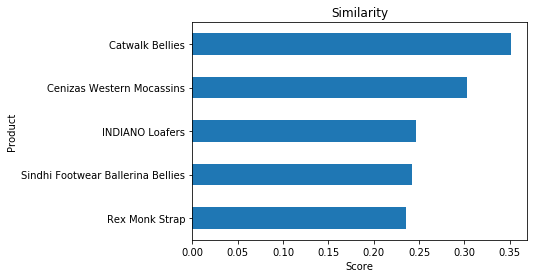

In [22]:
v = sim_df['Ladela Bellies']

v_sorted = v.sort_values()
v_sorted = v_sorted [-6:-1]

print(v_sorted)
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

plt.xlabel("Score")
plt.ylabel("Product")
plt.title("Similarity")

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [42.5, 42.5, 72.5, 72.5],
  [12.5, 12.5, 57.5, 57.5],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [102.5, 102.5, 132.5, 132.5],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [200.0, 200.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [210.0, 210.0, 242.5, 242.5],
  [180.0, 180.0, 226.25, 226.25],
  [160.0, 160.0, 203.125, 203.125],
  [117.5, 117.5, 181.5625, 181.5625],
  [35.0, 35.0, 149.53125, 149.53125],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [270.0, 270.0, 300.0, 300.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0,

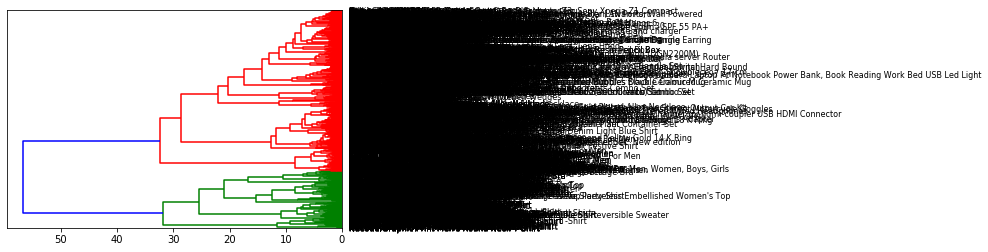

In [23]:
# ploting a dendrogram to look for relations in different products
Z = hierarchy.linkage(sims, 'ward')

hierarchy.dendrogram(Z, leaf_font_size=8, labels=sim_df.index, orientation='left')

-------------------------------------

## Looking at more examples for recommendations

### Recommendation for furniture

Balaji Velvet Sofa Cover                          0.203605
HomeTown CIAZ Fabric 3 Seater Sectional           0.224839
Durian BID/32625/A/2 Leatherette 2 Seater Sofa    0.448163
Durian BID/32625/A/3 Leatherette 3 Seater Sofa    0.516765
Durian Clinton/A/3 Leather 3 Seater Sofa          0.544427
Name: Durian Berry Solid Wood 3 Seater Sofa, dtype: float64


Text(0.5, 1.0, 'Similarity')

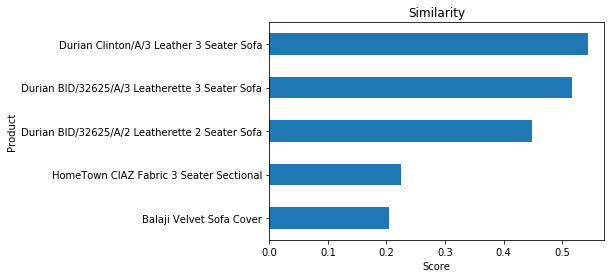

In [24]:
v = sim_df['Durian Berry Solid Wood 3 Seater Sofa']

v_sorted = v.sort_values()
v_sorted = v_sorted [-6:-1]

print(v_sorted)
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

plt.xlabel("Score")
plt.ylabel("Product")
plt.title("Similarity")

### Recommendation for shoes

Rex School Shoes           0.358484
Rex Monk Strap             0.366881
Pu-Easy Life Monk Strap    0.375469
Asian Lace Up Shoes        0.450538
ASIAN Walking Shoes        0.555678
Name: Hitway Lace Up, dtype: float64


Text(0.5, 1.0, 'Similarity')

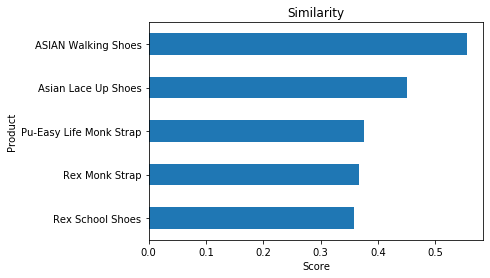

In [25]:
v = sim_df['Hitway Lace Up']

v_sorted = v.sort_values()
v_sorted = v_sorted [-6:-1]

print(v_sorted)
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

plt.xlabel("Score")
plt.ylabel("Product")
plt.title("Similarity")

### Recommendation for Sunglasses

Pu-Right Tennis-Black School Shoes                                                                       0.090199
knp enterprise Audi Style Alloy Mangalsutra                                                              0.095187
Spangel Fashion Audi Style Alloy Mangalsutra                                                             0.100214
Ditu&Kritu Warrior Aviator Sunglasses                                                                    0.102431
Kawachi Outdoor Sports Night Vision Driving Yellow Sunglass Plus White Transparent Motorcycle Goggles    0.126515
Name: Raees Wayfarer Sunglasses, dtype: float64


Text(0.5, 1.0, 'Similarity')

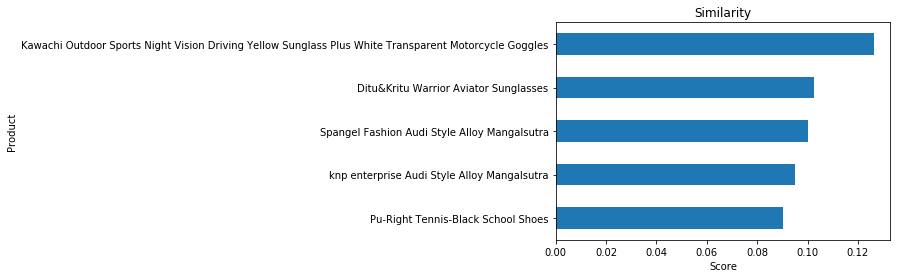

In [27]:
v = sim_df['Raees Wayfarer Sunglasses']

v_sorted = v.sort_values()
v_sorted = v_sorted [-6:-1]

print(v_sorted)
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

plt.xlabel("Score")
plt.ylabel("Product")
plt.title("Similarity")

----------------------------------------------------------

### - This far we have only looked at similarity based on Product description, further we could make decision based on **retail price, discounted price, FK Advantage, product rating, overall rating, brand** for better results.
### - We could come up with the effective ratings of product, where the rating of each product decreases as time passes, to give preference to products with more recent rating.